<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/Bi_CI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from scipy.stats import binomtest
import numpy as np
# res0 = np.array([[203, 231, 237, 239], [196, 223, 204, 216], [190, 222, 197, 170], [198, 220, 196, 166], [210, 220, 175, 155], [210, 222, 168, 148]])
# res0 = [[194, 207, 204, 199, 206, 197, 208, 195, 199, 210, 210, 203, 211, 208, 200, 215, 209, 202, 207, 203], [188, 203, 194, 194, 199, 207, 207, 200, 202, 201, 196, 201, 196, 196, 201, 190, 197, 193, 209, 199], [198, 196, 208, 203, 186, 200, 202, 197, 191, 203, 198, 201, 200, 191, 194, 200, 200, 202, 196, 189], [193, 198, 205, 196, 202, 199, 205, 193, 194, 204, 198, 201, 205, 198, 195, 201, 212, 202, 205, 204], [208, 193, 201, 208, 205, 200, 199, 198, 198, 203, 215, 195, 205, 207, 204, 208, 202, 213, 206, 213], [203, 202, 208, 210, 206, 201, 204, 201, 196, 209, 202, 203, 197, 203, 192, 212, 215, 201, 203, 199]]
res0 = np.array([[(67, 67), (78, 78), (78, 78)], [(70, 83), (81, 88), (72, 88)], [(65, 88), (74, 88), (67, 90)], [(67, 85), (78, 90), (64, 90)]])
top1 = np.array(res0[:,:,0])
topn = np.array(res0[:,:,1])
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [ ]:
pip install SciencePlots

In [29]:
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.pyplot as pp
plt.style.use('science')
plt.rc('text',usetex=False)

Text(151.75, 0.5, 'Number of Beams')

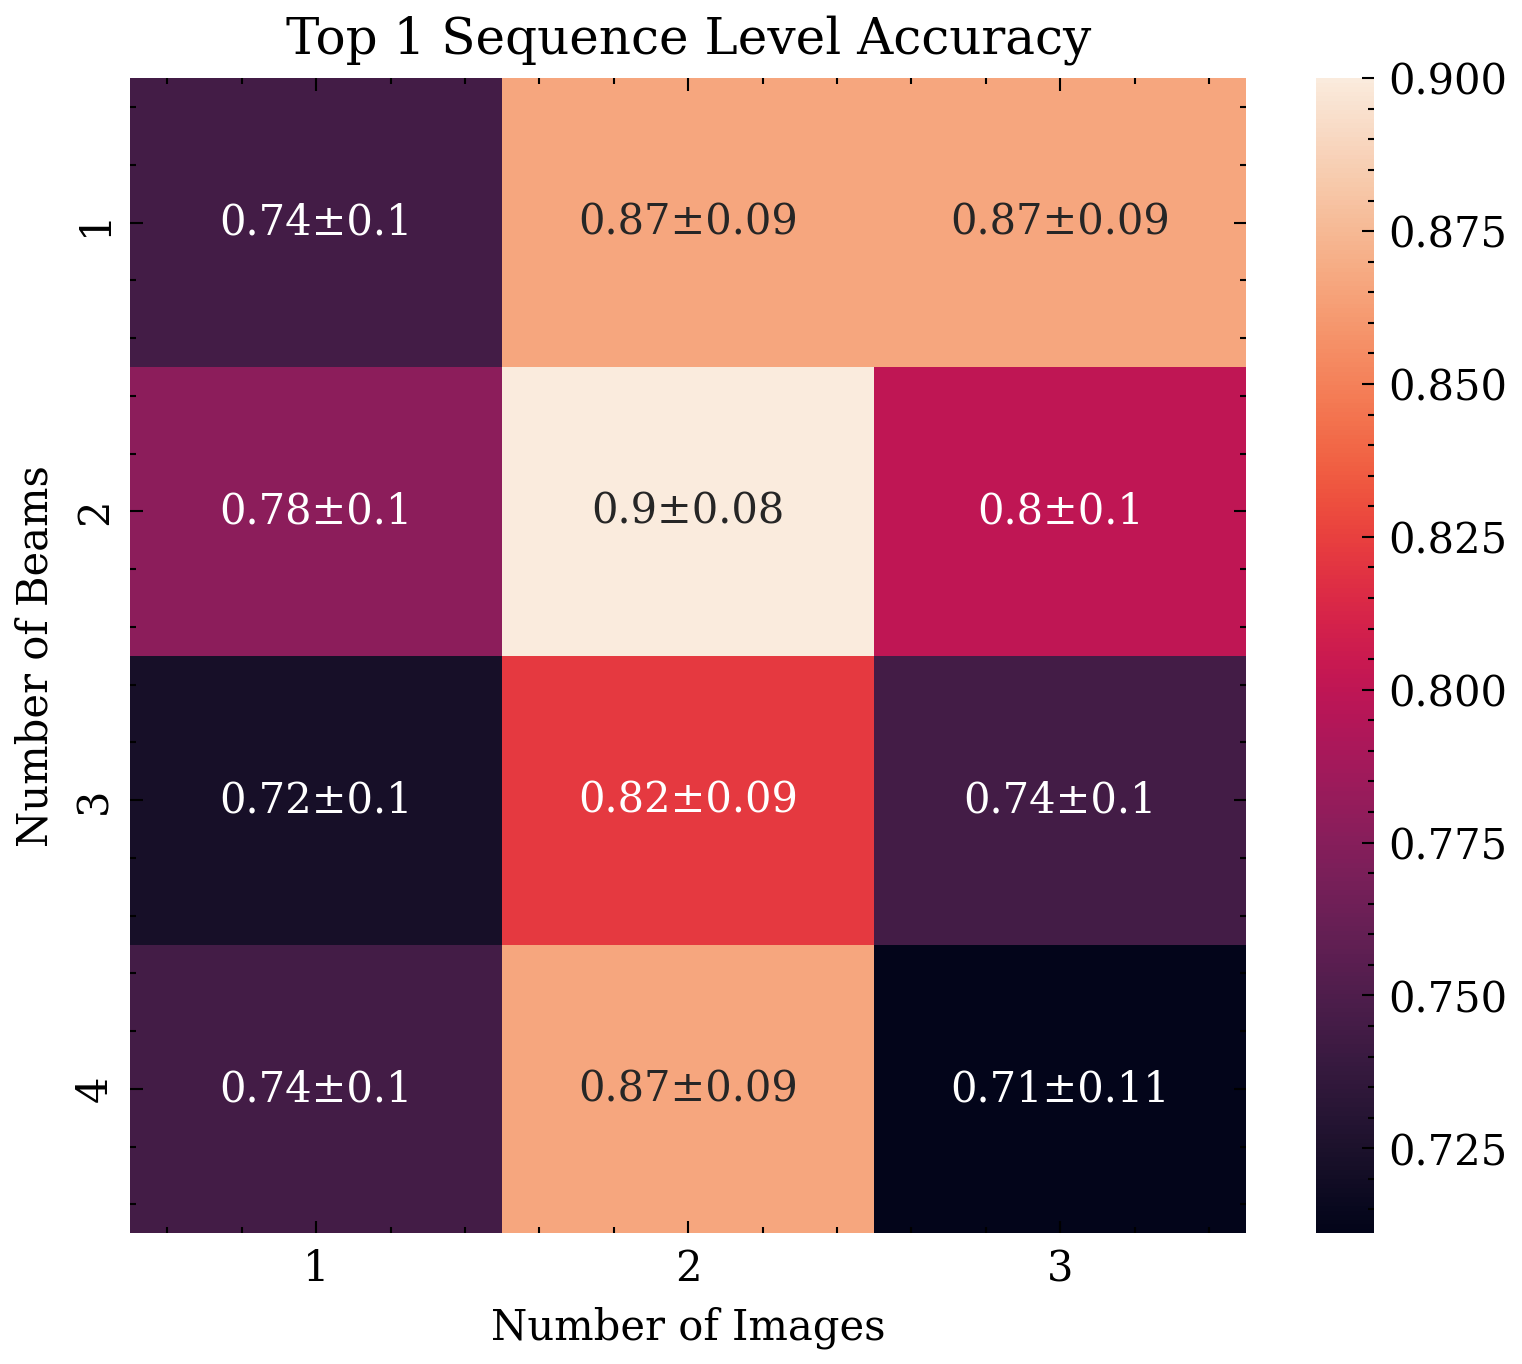

In [45]:
import seaborn as sns
import pylab
pylab.rcParams["figure.figsize"] = (6,5)
CI = np.array([[(i/9/10)-binomtest(i, 9*10).proportion_ci(0.95).low for i in res] for res in top1])

res = top1/90
sns.heatmap(res, annot=[[f"{res[i,j].round(2)}±{CI[i,j].round(2)}" for j in range(top1.shape[1])] for i in range(top1.shape[0])], fmt = '', yticklabels=range(1,5), xticklabels=range(1,4))
pylab.xlabel("Number of Images")
pylab.title("Top 1 Sequence Level Accuracy")
pylab.ylabel("Number of Beams")

Text(151.75, 0.5, 'Number of Beams (n)')

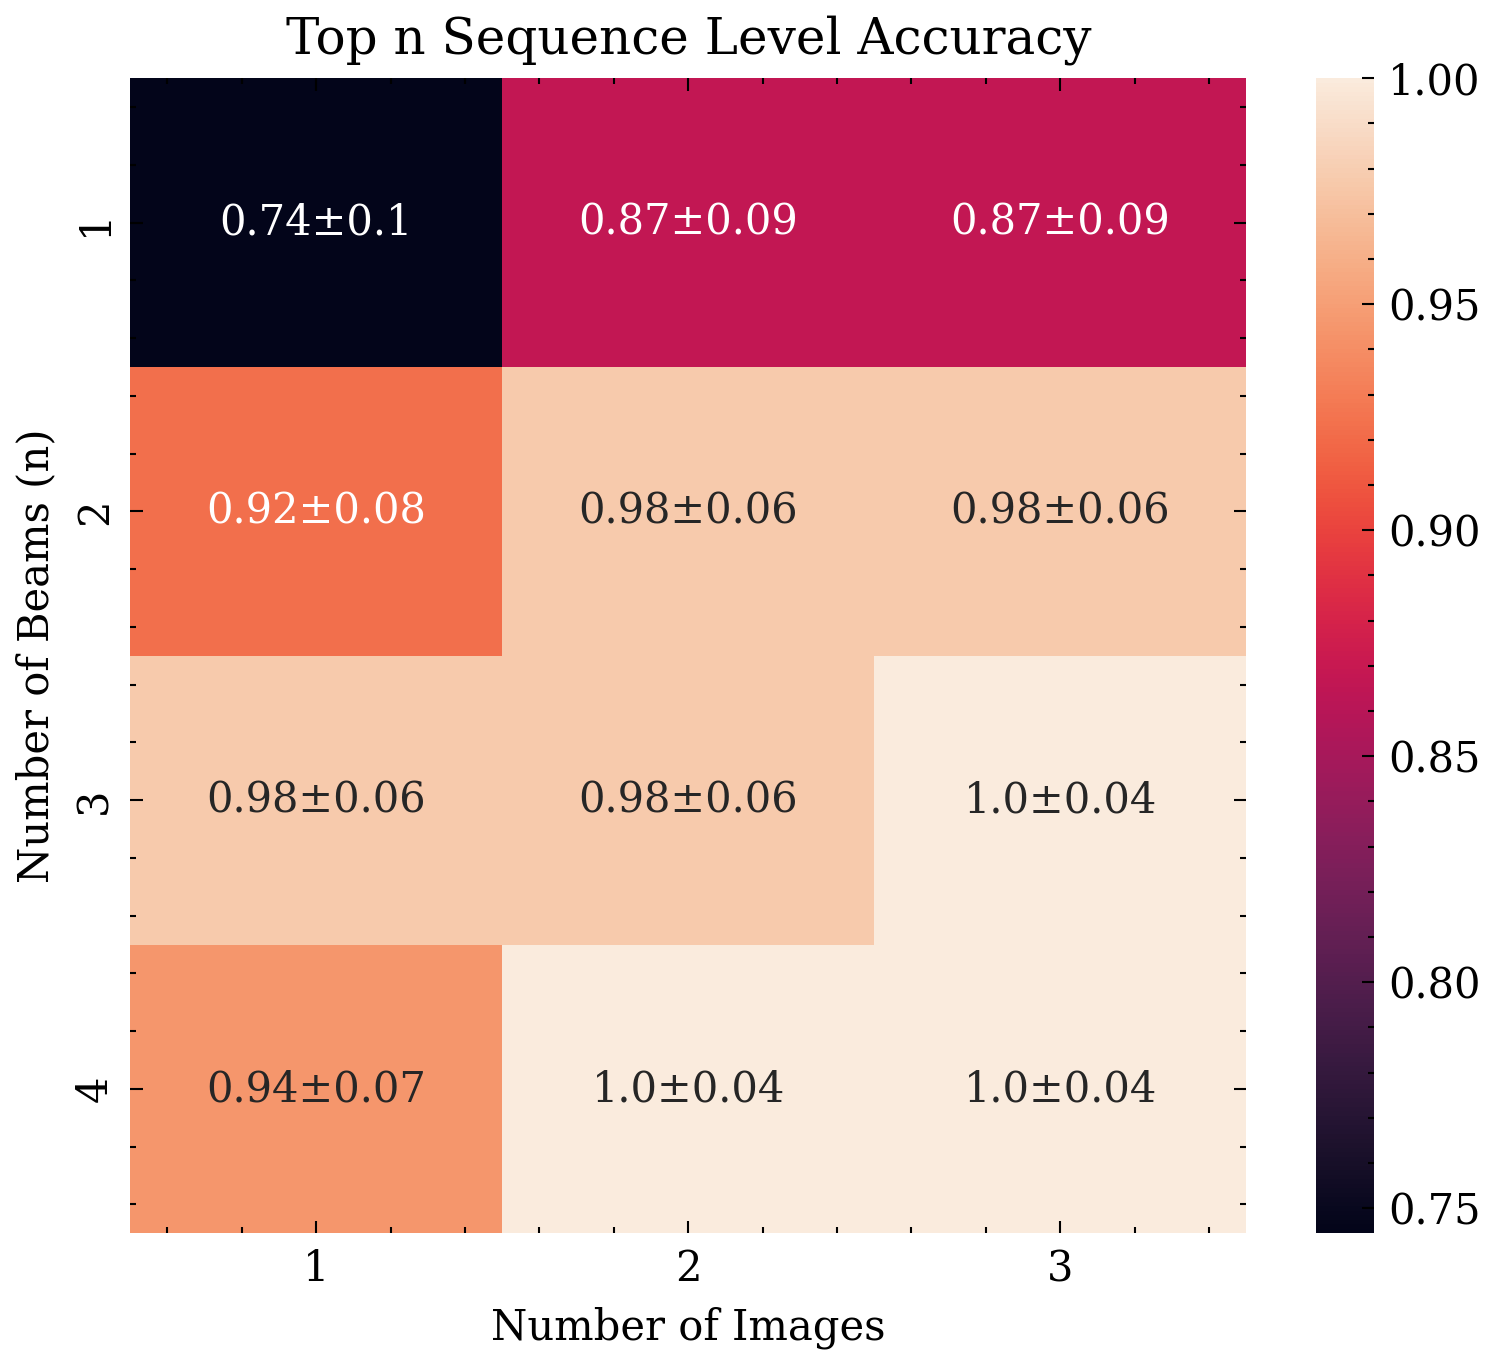

In [46]:
import seaborn as sns
import pylab
pylab.rcParams["figure.figsize"] = (6,5)

res = topn/90
CI = np.array([[(i/9/10)-binomtest(i, 9*10).proportion_ci(0.95).low for i in res] for res in topn])

sns.heatmap(res, annot=[[f"{res[i,j].round(2)}±{CI[i,j].round(2)}" for j in range(top1.shape[1])] for i in range(top1.shape[0])], fmt = '', yticklabels=range(1,5), xticklabels=range(1,4))
pylab.xlabel("Number of Images")
pylab.title("Top n Sequence Level Accuracy")
pylab.ylabel("Number of Beams (n)")

<ErrorbarContainer object of 3 artists>

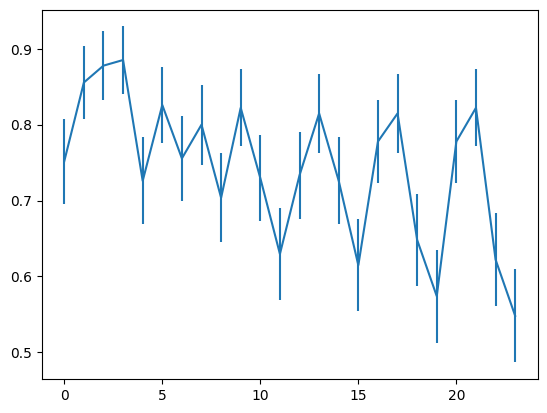

In [ ]:
import pylab
pylab.errorbar(x=range(len(CI)),y=res/(9*30),yerr=CI)